# **Bike Sharing Assignment**
## *Upgrad project 2*
### project by **Géraldine Bengsch**

# Aims of the project
This project aims to explore bike sharing data set and build a multiple linear regression model based on initial EDA.
This notebook demonstrates my thought process and shows the reader the steps taken and the insights gathered from the data. It documents my process of becoming familiar with the data, initial exploration, initial insights and more complex visualisations. The analysis is thus conducted in stages, individual sections can be found in the table of contents (*note: TOC works in Jupyter notebook, not in github*).
The notebook begins by explaining the business problem that is addressed. It then moves to data understanding and data cleaning. The majority of the notebook is comprised of data analysis, corresponding visualisations and the building of a multiple linear regression model. Insights from the analysis are presented below the respective graphs. The notebook concludes with insights of the analysis.
The notebook relies on `day.csv` found in the project for the analysis

## Table of Contents
* [0. Business Problem](#0-business-problem)
    * [0.1 Boom Bikes](#0-boom-bikes)
* [1. Data Understanding](#1-data-understanding)
* [2. Data Cleaning](#2-data-cleaning)
    * [2.1 Missing values](#21-missing-values)
* [3. Exploratory Data Analysis](#3-exploratory-data-analysis)
    * [3.1 Visualising Numerical Variables](#31-visualising-numerical-variables)
    * [3.2 Visualising Categorical Variables](#32-visualising-categorical-variables)
    * [3.3 Other visualisations](#33-other-visualisation)
    * [3.4 Identifying correlations](#34-identifying-correlations)
    * [3.5 Dropping unneccessary columns](#35-dropping-unneccessary-columns)
* [4. Data preparation](#4-data-preparation)
    * [4.1 Creating dummy variables](#41-creating-dummy-variables)
    * [4.2 Splitting the data into training and testing sets](#42-splitting-the-data-into-training-and-testing-sets)
    * [4.3 Rescaling the features](#43-rescaling-the-features)
    * [4.4 Dividing the dataset](#44-dividing-the-dataset)
* [5. Feature Engineering](#5-feature-engineering)
    * [5.1 Recursive feature elimination](#51-recursive-feature-elimination)
        * [5.1.1 Model building with statsmodel using RFE](#511-model-building-with-statsmodel-using-rfe)
    * [5.2 Checking VIF and rebuilding model](#52-checking-vif-and-rebuilding-model)
        * [5.2.1 New model 1](#521-new-model-1)
        * [5.2.2 New model 2](#521-new-model-2)
        * [5.2.3 New model 3](#521-new-model-3)
        * [5.2.4 New model 4](#521-new-model-4)
        * [5.2.5 Residual analysis of the training data](#525-residual-analysis-of-the-training-data)
    * [5.3 Predictions](#53-predictions)
    * [5.4 Evaluation of the model](#54-evaluation-of-the-model)
    * [5.5 R-squared for test set](#55-r-squared-for-test-set)
    * [5.6 Check for other assumptions](#56-check-for-other-assumptions)
        * [5.6.1 Check for Multicollinearity](#561-check-for-multicollinearity)
        * [5.6.2 Check for Autocorrelations](#562-check-for-autocorrelations)
        * [5.6.3 Check for Homoscedasticity](#563-check-for-homoscedasticity)
        * [5.6.4 Check Normality of Residuals](#564-check-normality-of-residuals)
        * [5.6.5 QQ Plot](#565-qq-plot)
* [6. Insights](#6-insights)

# 0. Business Problem

 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## 0.1 Boom Bikes

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

# 1. Data Understanding

The first phase of the project consisted of becoming familiar with the data set. I imported the necessary libraries, read in the data set from the provided file into a data frame, and inspected it.

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson


# print library versions
print("\n")
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("sklearn: ",sklearn.__version__)
print("statsmodels: ",statsmodels.__version__)
print("scipy: ",scipy.__version__)

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex




python:  3.10.0
numpy:  1.22.1
pandas:  1.4.0
matplotlib:  3.5.1
seaborn:  0.11.2
sklearn:  1.0.2
statsmodels:  0.13.1
scipy:  1.8.0


In [2]:
# read data into a first data frame
day = pd.read_csv('day.csv')

In [3]:
# see the data with all columns
pd.set_option('display.max_columns', None)
# display first five rows
day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

The data set consists of 730 rows and 16 columns. It contains categorical and continuous variables that describe different types of data the company collects for its business. Not all of the columns will be useful for the analysis. EDA will be used to discover which data will be useful to build a regression model.

In [5]:
#display basic statistical information for the data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Here are basic statistical insights. The count already shows that there is no missing data, but this will be confirmed later. It also shows that there are more registered than casual riders. The standard deviation of holiday, workingday and weathersit is low, suggesting that the data is clustered around the mean. Other variables appear to have more spread out data.

# 2. Data Cleaning


## 2.1 Missing values
The data set was analysed for missing values. There are no missing values in the data set

In [7]:
day.isnull().sum().sum()

0

# 3. Exploratory Data Analysis

Exploratory data analysis of the data set consisted of considerations of how to gain useful insights from the data.

## 3.1 Visualising Numerical variables

In [77]:
#increase font size of all elements
sns.set(font_scale=2)
plt.figure(figsize=(60, 50))
sns.pairplot(day)
plt.show()

***
### Insight into numerical variables
The graphs show that actual and perceived temperature appear to be related to the number of bikes being rented, because they show linearity and homoscedasticity.
***

## 3.2 Visualising categorical variables

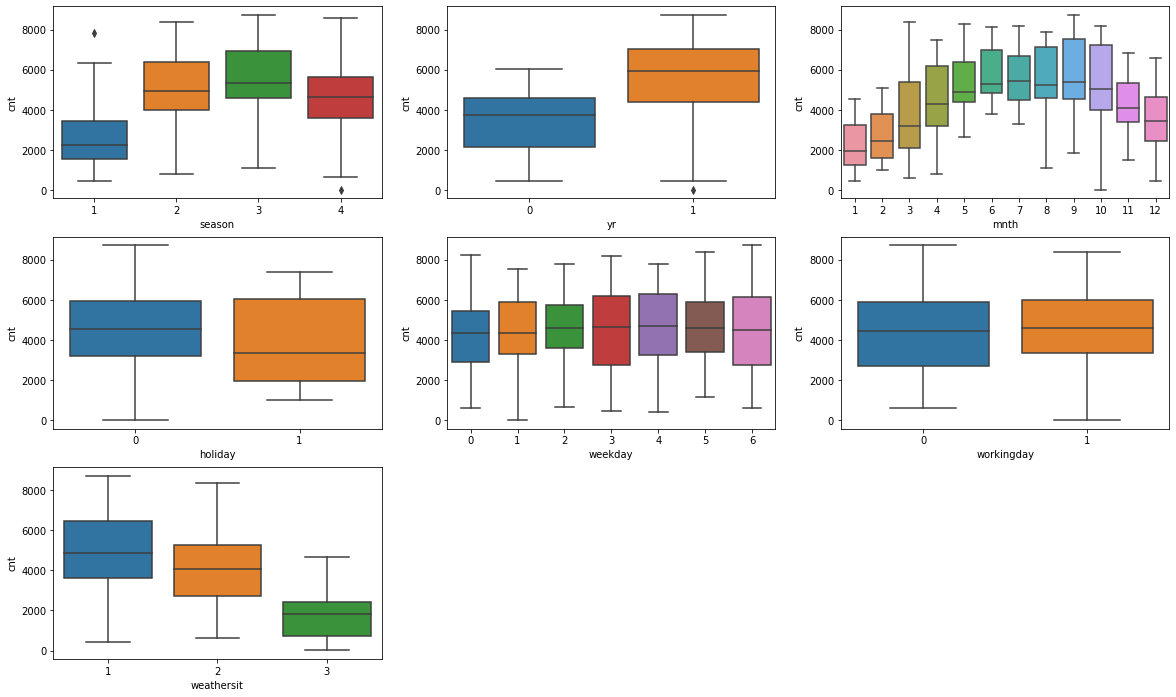

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.show()

***
### Insight into categorical variables
The graphs show that more bikes are rented during the warmer months/seasons, and with better weather. There are no bikes being rented in icy weather (weather condition 4). Significantly more bikes have been rented in the second year of operation. There are slightly more bikes being rented on working days and days that are not holidays.
***

## 3.3 Other visualisations

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


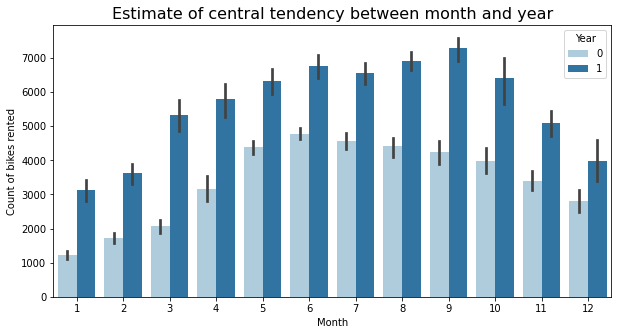

In [10]:
#Relation between month and year
plt.figure(figsize=(10,5))
sns.barplot('mnth','cnt',hue='yr',data=day,palette='Paired')
plt.title('Estimate of central tendency between month and year', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Count of bikes rented')
plt.legend(title='Year')
plt.show()

***
### Insight into bikes rented in two years
The graphs show that bike rentals went up in the company's second year of operation. The general tendency between bike rentals throughout the year remained similar: bike rentals are generally higher in the warmer months.
***

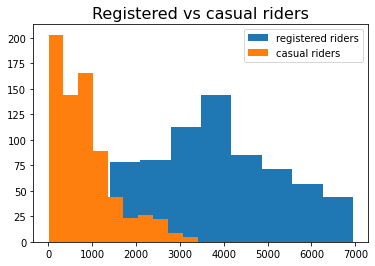

In [11]:
#comparing registered and casual riders
plt.hist(day['registered'])
plt.hist(day['casual'])
plt.title('Registered vs casual riders', fontsize=16)
plt.legend(labels=['registered riders','casual riders'])

***
### Insight into registered vs casual riders
The graph show that the company had initially more casual riders. However, over time, the majority of riders are registered users.
***

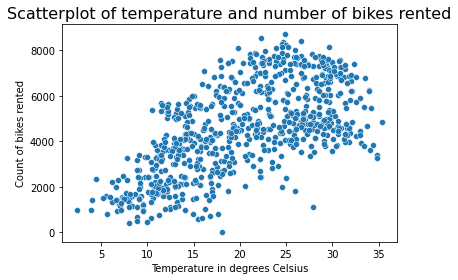

In [12]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='cnt' ,data=day)
plt.title('Scatterplot of temperature and number of bikes rented', fontsize=16)
plt.xlabel('Temperature in degrees Celsius')
plt.ylabel('Count of bikes rented')
plt.show()

***
### Insight into temperature on count of bikes rented
While there is no clear correlation line, there appear to be more bikes being rented in pleasant weather; that is, weather that is not too cold, but also not too hot (Between 20 and 30 degrees Celsius)
***

## 3.4 Identifying correlations

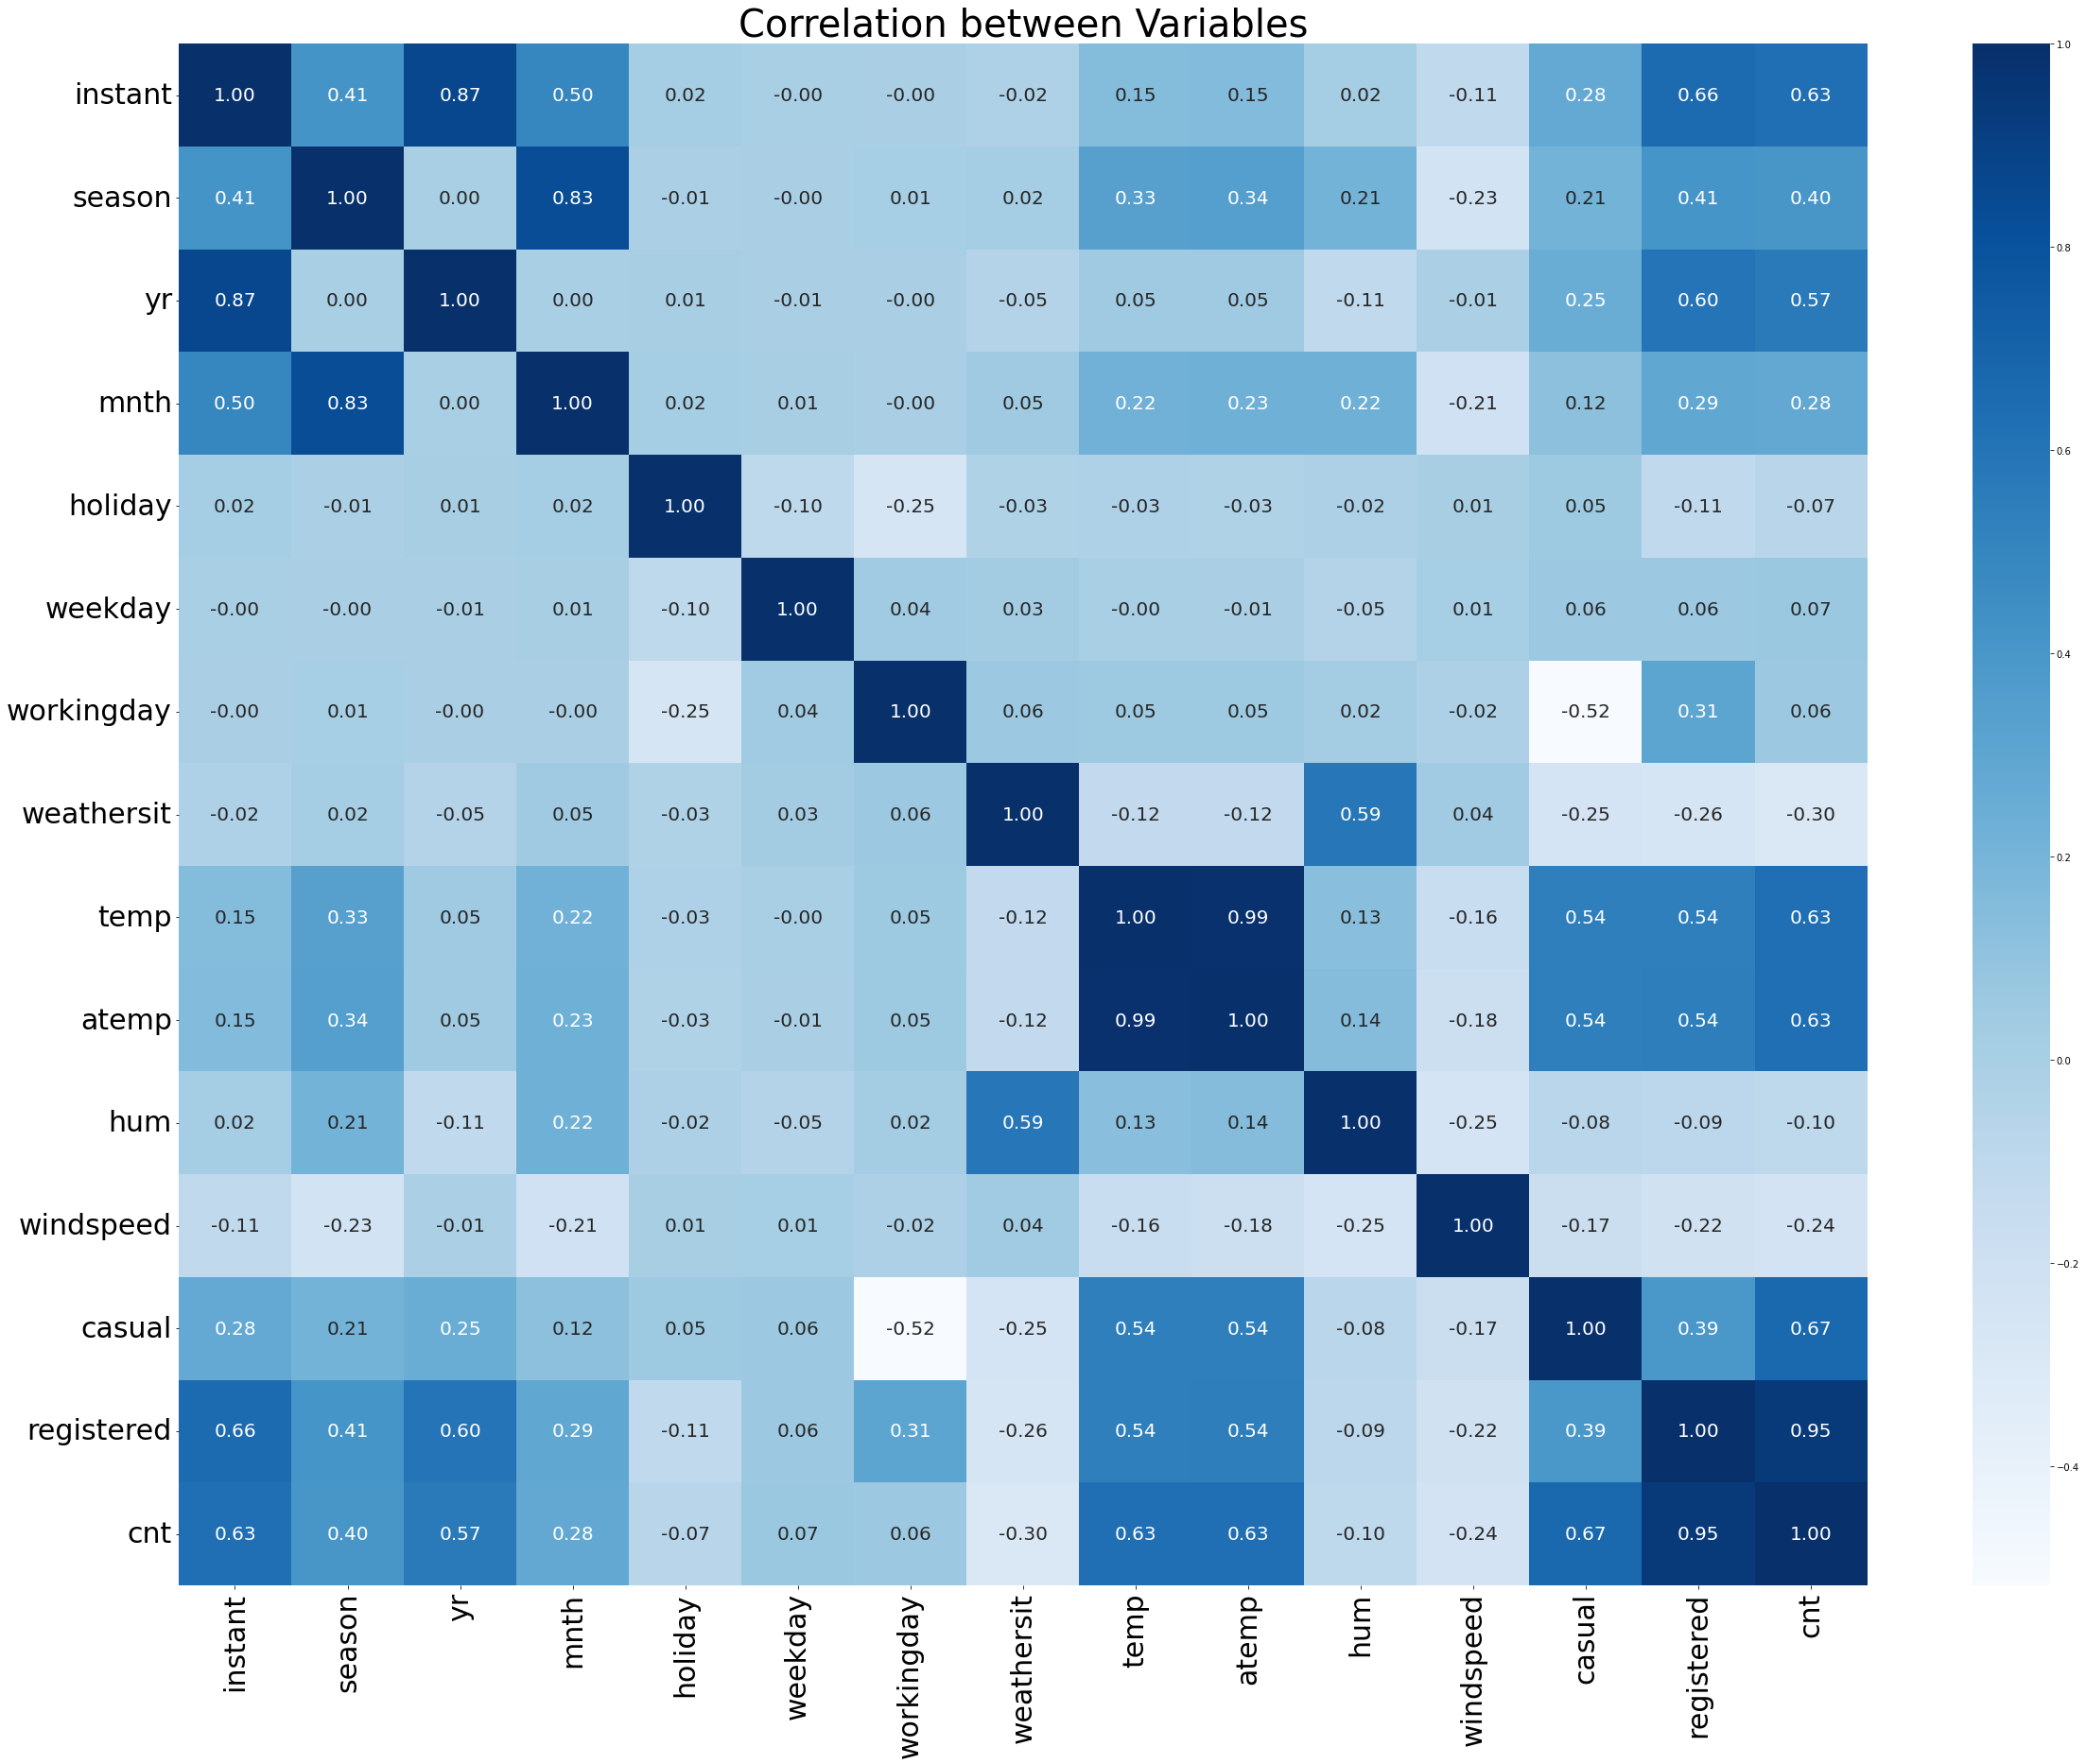

In [13]:
#Heatmap to see correlation between variables
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.heatmap(day.corr(), cmap='Blues', annot = True, annot_kws={"size": 20}, fmt=".2f", )
plt.title("Correlation between Variables", fontsize=40)
plt.show()


***
### Insight into correlations between variables
`cnt`, the count of bikes rented is correlated to `temp`, `atemp`, `casual`, `registered` and `instant`. However, `instant` is the index number in the dataset, so that it does not provide meaningful insights. Temperature and perceived temperature also show a very high correlation. This might be, because more bikes tend to be rented in nicer weather, where there is not a great difference between the actual and perceived temperature. Registered users also shows a very high correlation to count. Arguably, this is not surprising as one might assume that customers who choose to register are more likely to intend to utilise the service on a regular basis.
***


## 3.5 Dropping unneccessary columns

In [14]:
#drop unnecessary columns and check the output
day=day.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Given the insights into correlations above, the decision was made to drop `instant`, `dteday`, `casual`, `registered` and `atemp`. The index of the data set, `instant`, does not add insights into the data. With season, month, holiday, weekday and workingday, there are plenty of data points that address the date, hence the actual date, `dteday`, does not provide extra value. `atemp` appears to almost fully expressed by `temp`. However, the actual temperature is probably more meaningful, so that `atemp` is dropped. `registered` also appears to be expressed by `cnt`, so that `registered` and `casual` are dropped.

# 4. Data preparation
In this step, the data is prepared for building a regression model. These individual steps are:
- 4.1 create dummy variables for all categorical features
- 4.2 divide the data to train and test
- 4.3 perform scaling
- 4.4 divide data into dependent and independent variables

## 4.1 Creating dummy variables

The dataset contains a couple of categorical values. This means that the variable is changed so that it is represented by only the value 0 or 1 to show the absence or presence which may shift the outcome of the prediction in a linear regression analysis. Creating dummy variables is useful, because the variable is more flexible and allows multiple comparisons to be made.
The dummy variables in this dataset are constructed as follows:
- season - 4 levels
- mnth - 12 levels
- weekday - 7 levels
- weathersit - 4 levels
First, categorical variables are mapped to a string, then converted to a dummy variable, using n-1 to ensure that there is multicollinearity between dummy variables.

In [15]:
# Map categorical values to numeric for season and create dummy variable in separate data frame

day.season = day.season.map({1: 'spring', 2: 'summer', 3: 'autumn', 4: 'winter'})
season_dummy = pd.get_dummies(day['season'], drop_first = True)

# Map categorical values to numeric for month and create dummy variable in separate data frame

day.mnth=day.mnth.map({1:'jan', 2:'feb', 3:'mar',4:'apr',5:'may',6:'jun', 7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
mnth_dummy = pd.get_dummies(day['mnth'], drop_first = True)

# Map categorical values to numeric for weekday and create dummy variable in separate data frame

day.weekday=day.weekday.map({0:'mon', 1:'tues', 2:'wed',3:'thurs',4:'fri',5:'sat',6:'sun'})
weekday_dummy = pd.get_dummies(day['weekday'], drop_first = True)

# Map categorical values to numeric for weather and create dummy variable in separate data frame

day.weathersit=day.weathersit.map({1:'clear', 2:'misty', 3:'cloudy', 4:'heavyrain'})
weathersit_dummy = pd.get_dummies(day['weathersit'], drop_first = True)

In [16]:
# check that the variables have been remapped correctly
print('Check remapped value:\n', day.season.head())
# check that the dummy variables have been created correctly
print('Check dummy value:\n', season_dummy.head())

Check remapped value:
 0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object
Check dummy value:
    spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0


In [17]:
# Add dummy variables to the main datafram and check the output

day = pd.concat([day,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy], axis =1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
0,spring,0,jan,0,sun,0,misty,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,spring,0,jan,0,mon,0,misty,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,spring,0,jan,0,tues,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,spring,0,jan,0,wed,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,thurs,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
# Drop the variables that have been converted to dummy variables as the dummies for it have been created and check the data frame

day.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
# check the number of rows and columns
day.shape

(730, 29)

The final shape of the dataframe is 730 rows and 29 columns. Despite having dropped four columns, there are now more columns than in the original dataset. This is due to the encoding of the dummy variables. Details can be seen in the distribution of the columns in the print out above.

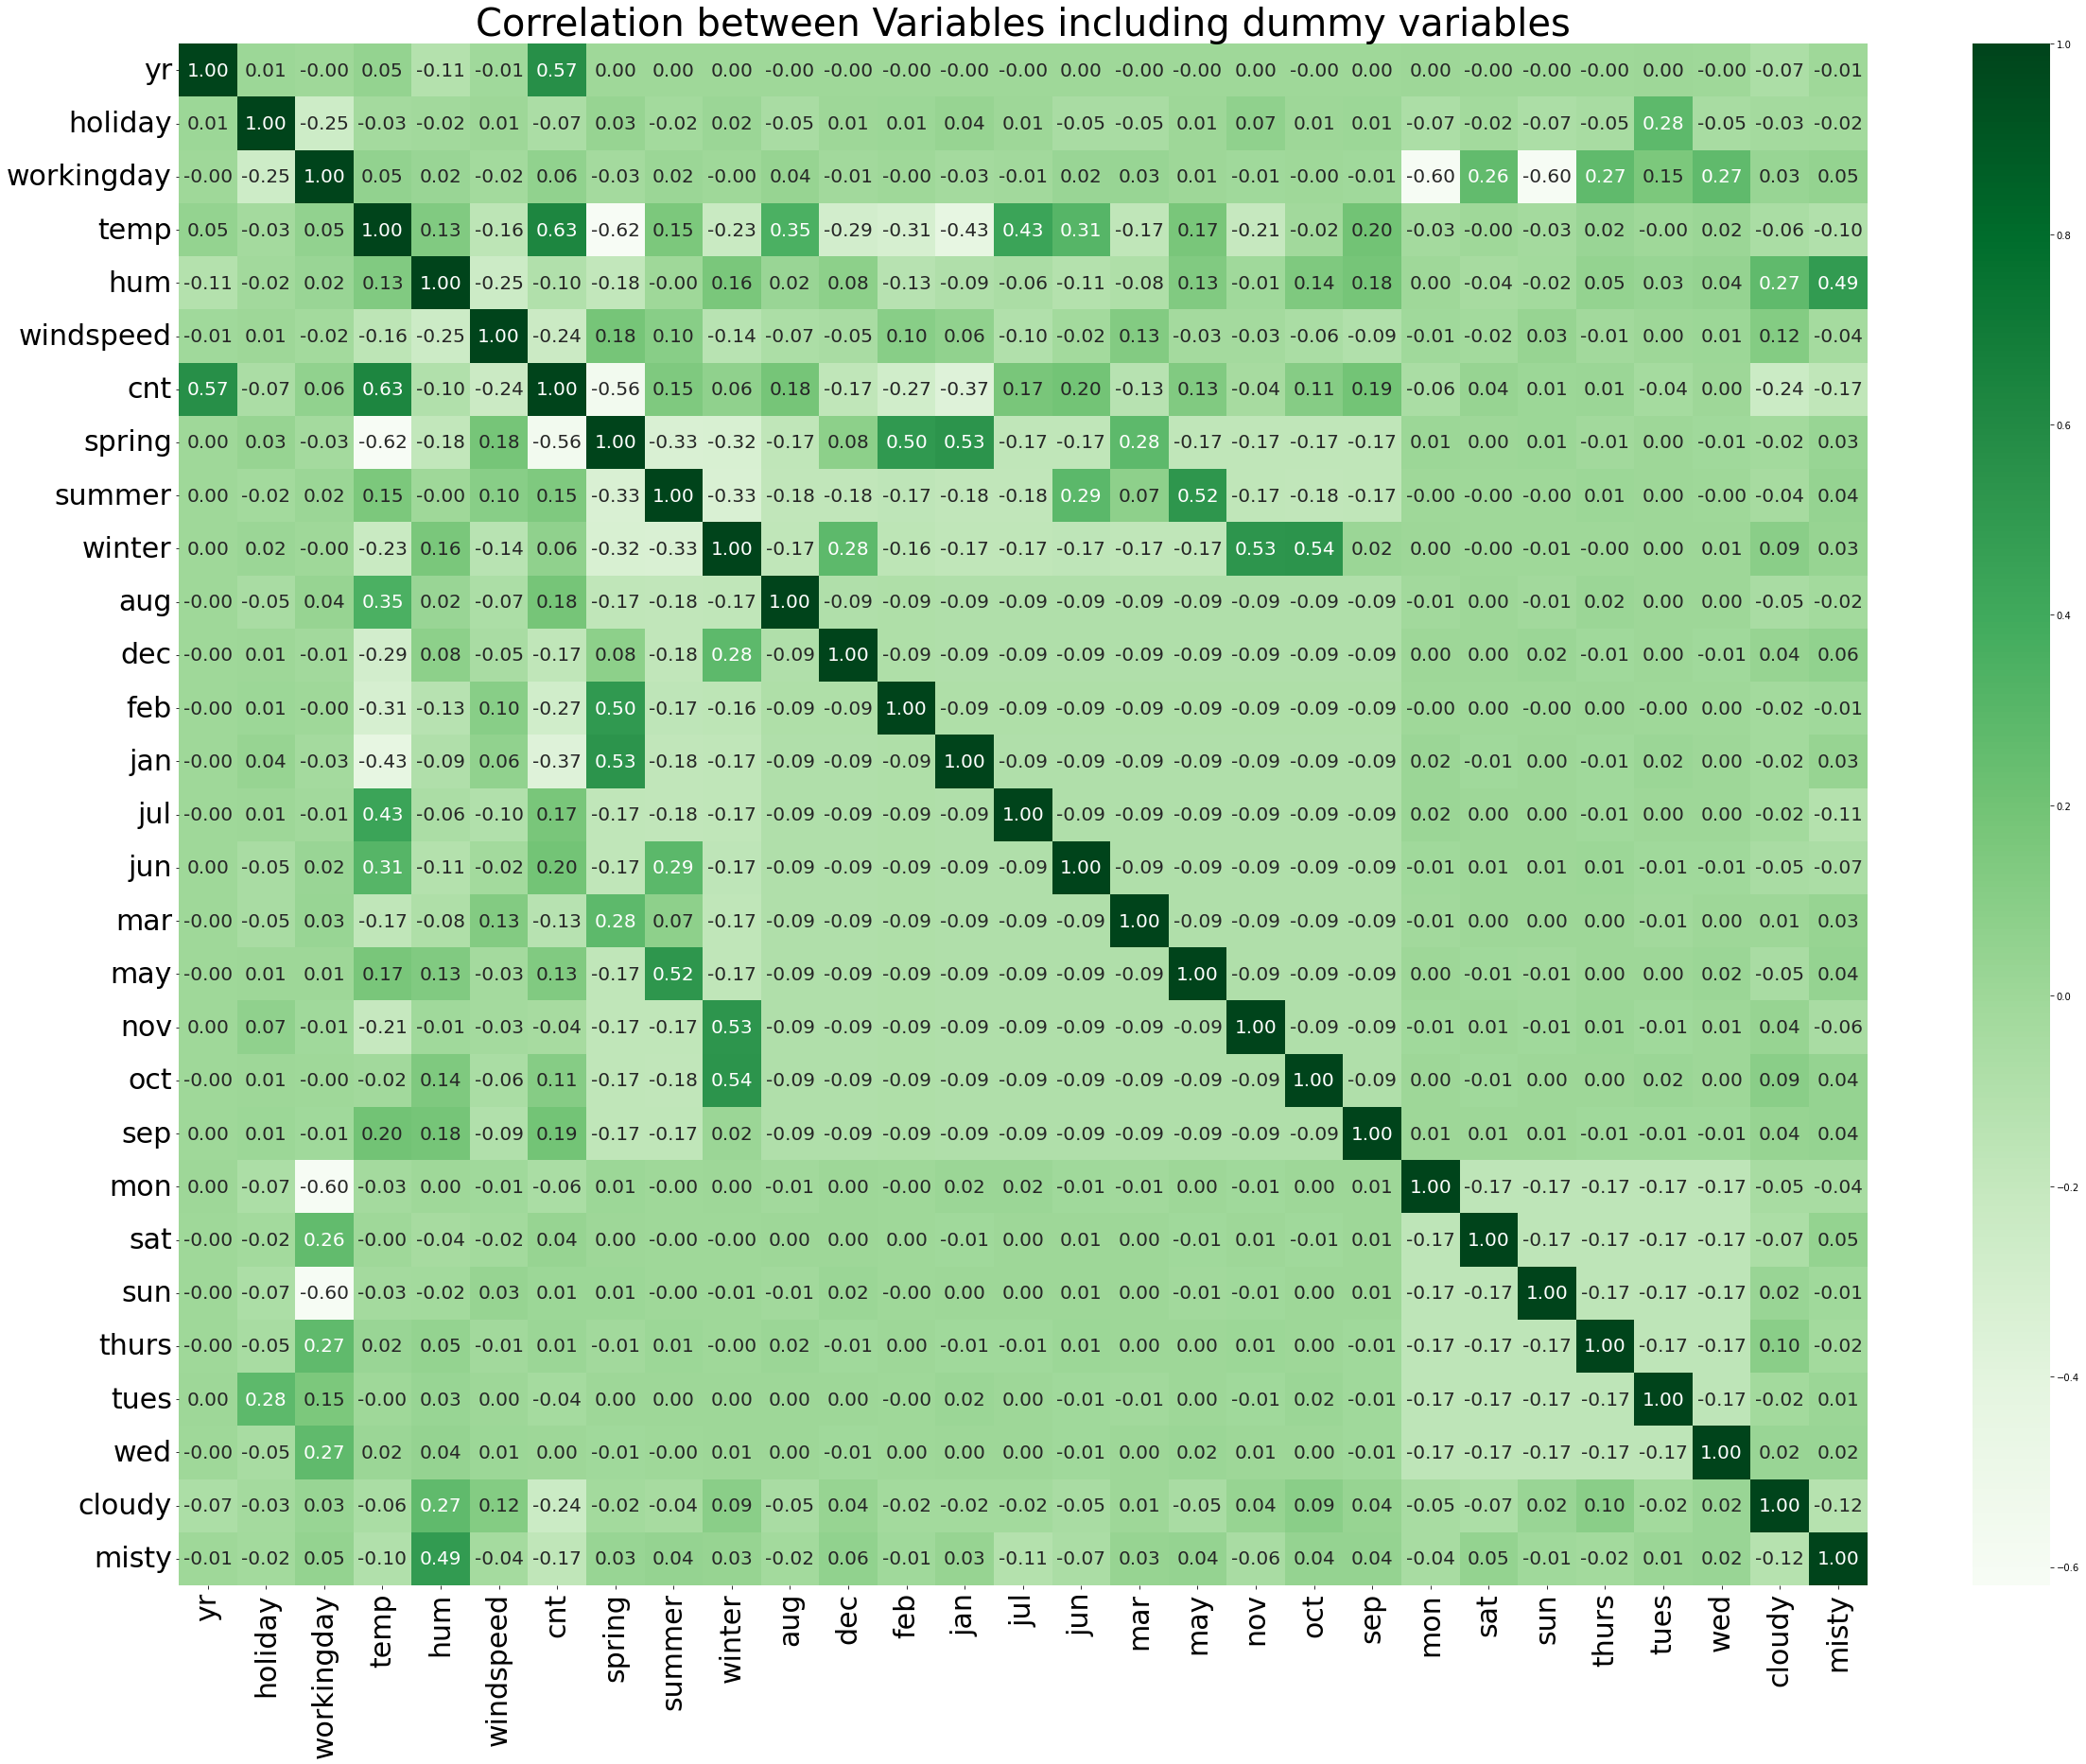

In [20]:
#Heatmap to see correlation between variables
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.heatmap(day.corr(), cmap='Greens', annot = True, annot_kws={"size": 20}, fmt=".2f", )
plt.title("Correlation between Variables including dummy variables", fontsize=40)
plt.show()

***
### Insight into correlations between variables including dummy variables 
The number of bike rentals (`cnt`) is correlated to variables related to warmer temperatures (`temperature`, `summer`, `jun`, `jul`, `aug`, `sep`, `oct`). This was already infered from looking at the descriptive data analysis earlier and is now being confirmed
***




## 4.2 Splitting the data into training and testing sets

The data set is divided into two subsets: the training set (70%) to train the model and a test set (30%) to test the trained model. The aim is to create a training set that is representative of the data set as a whole. To do this, the rows are selected randomly from the data.
</br>
![traintestpic](img/traintest.png)

In [21]:
# set the seed to ensure that train and test set retain the same rows
np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
#Rows and columns after split
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


## 4.3 Rescaling the features
Here, the variables are scaled to normalise the range of independent variables (features). Here, the minmax scaler was chosen and applied to the dataset, excluding the dummy and boolean variables.

In [23]:
#setting the imported scaler to a variable
scaler = MinMaxScaler()

In [24]:
# applying the scaler to all variables, excluding the dummy variables, and boolean variables
num_vars = ['temp', 'hum','windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [25]:
# check that variables are between 0 and 1 after scaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Min-max normalisation consists in rescaling the range to 0-1. The information above shows that this has been achieved.

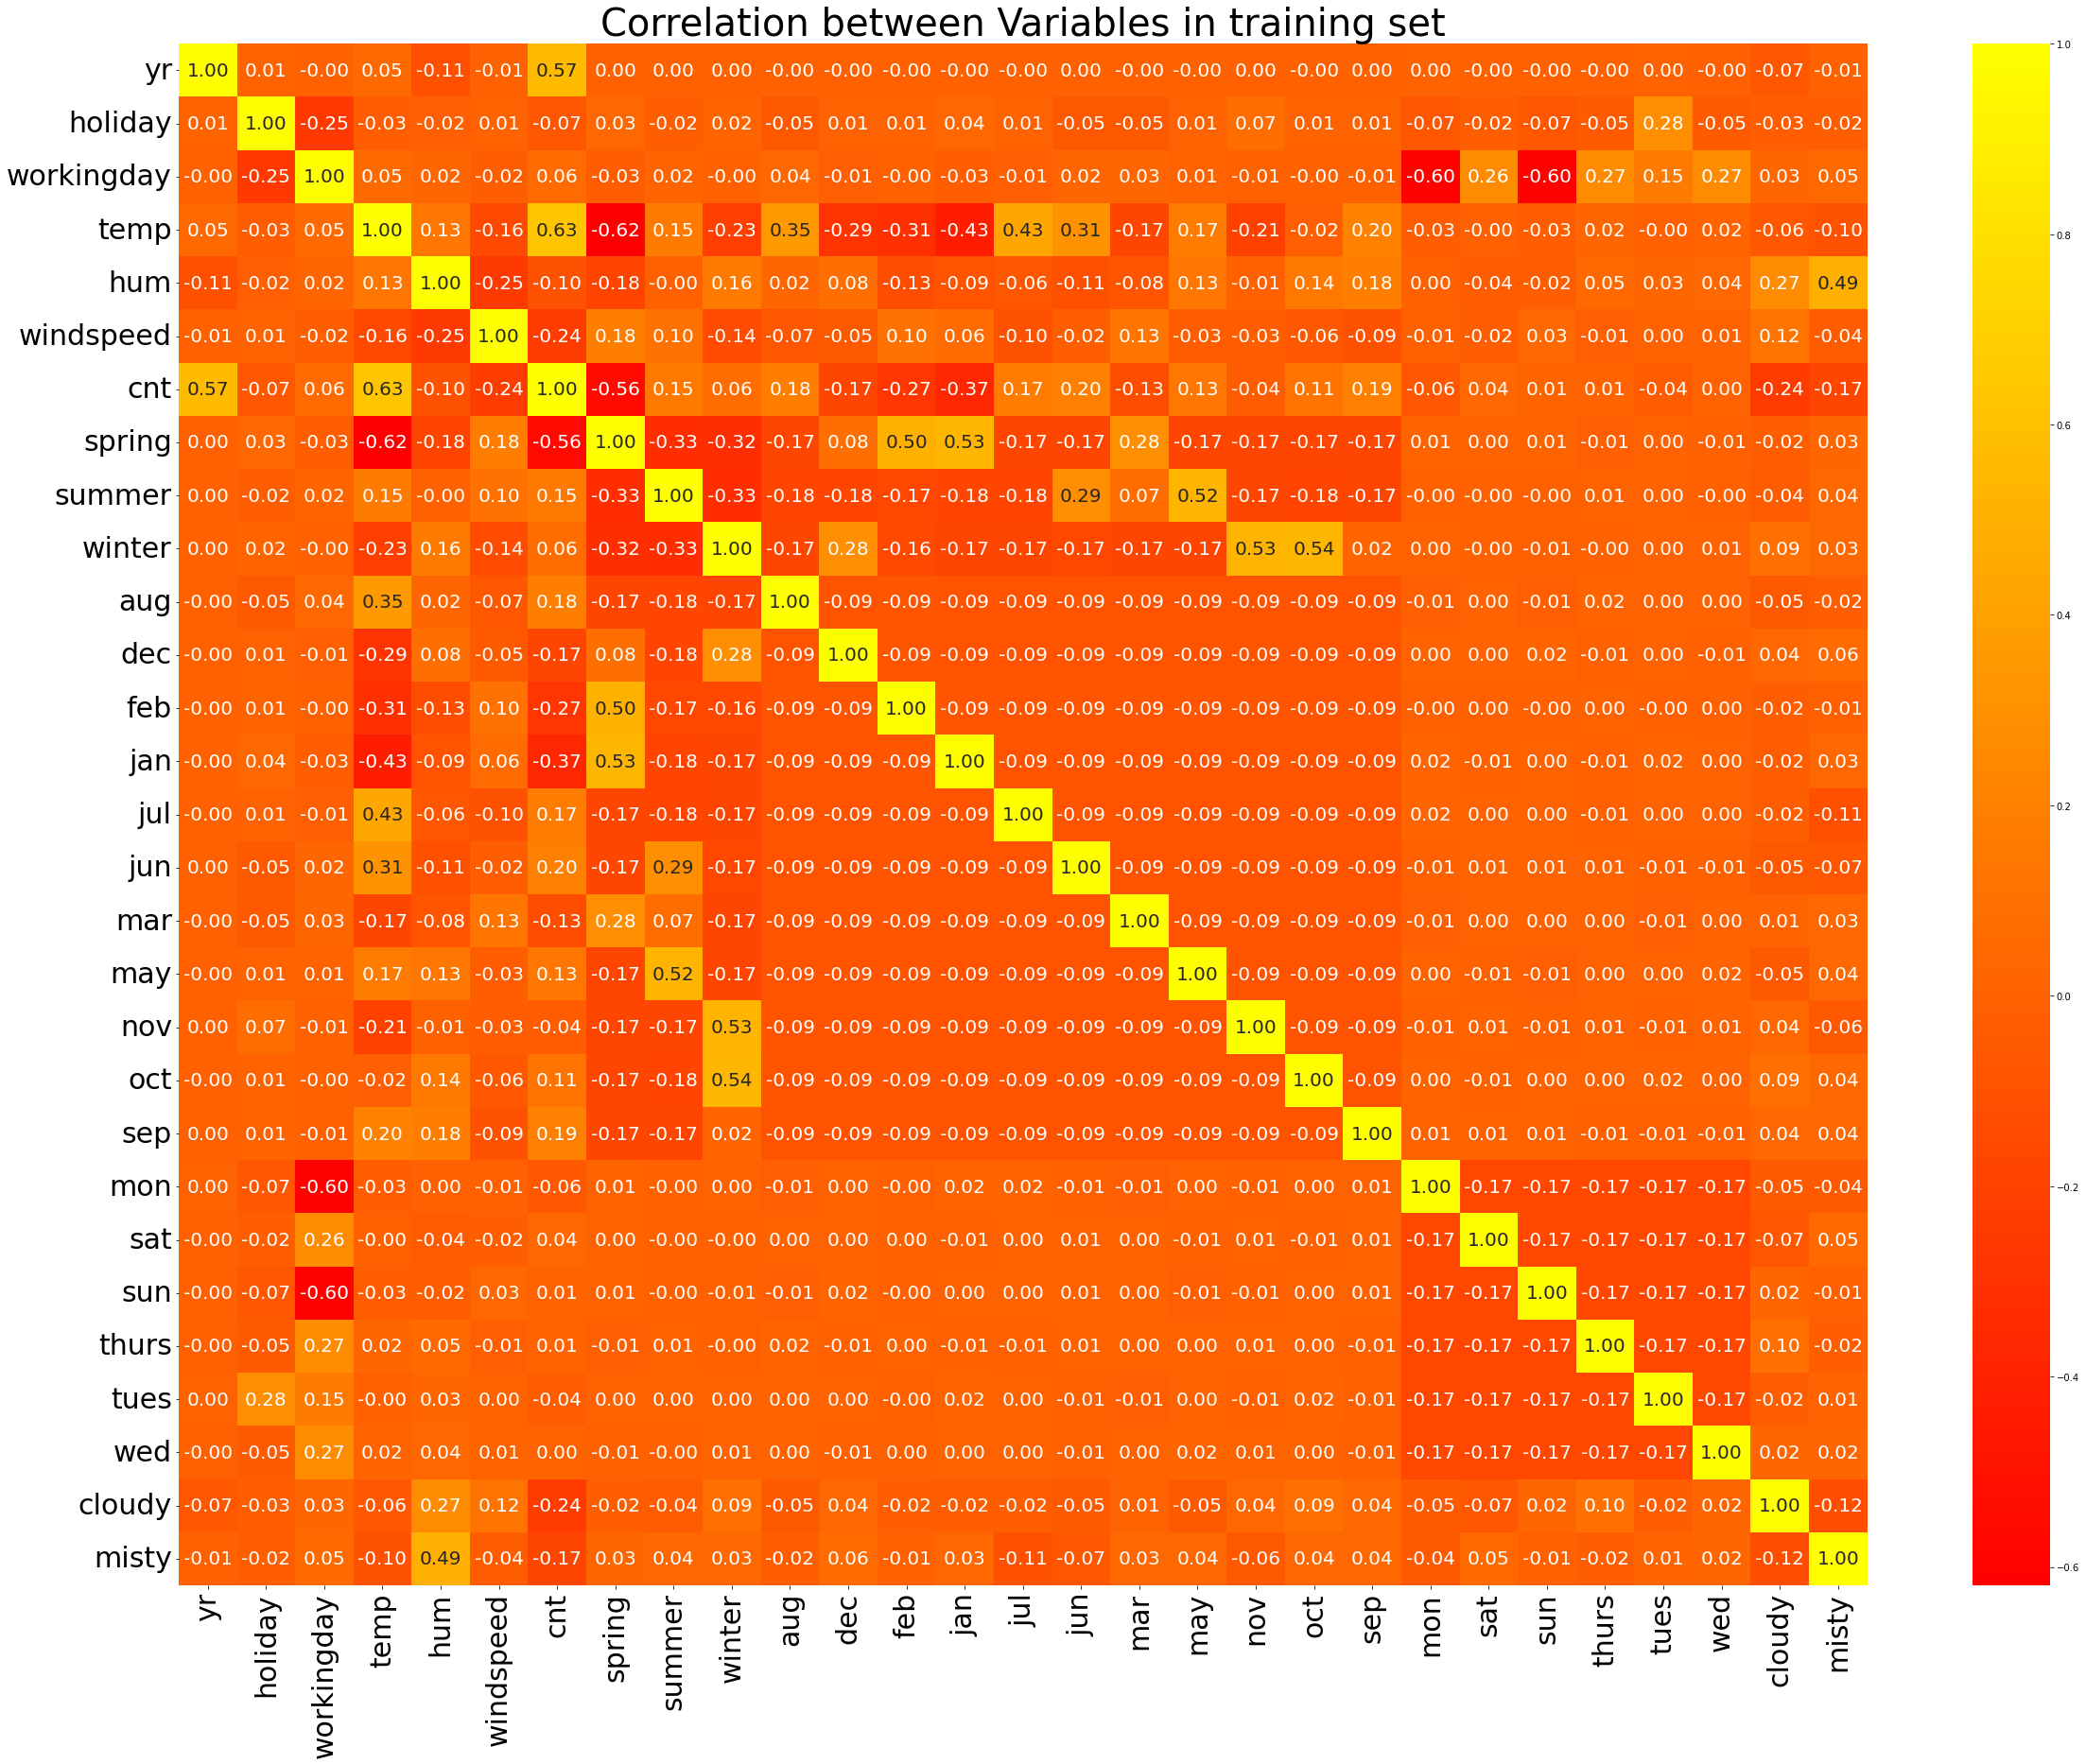

In [26]:
#Heatmap to see correlation between variables on training set
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sns.heatmap(day.corr(), cmap='autumn', annot = True, annot_kws={"size": 20}, fmt=".2f", )
plt.title("Correlation between Variables in training set", fontsize=40)
plt.show()

***
### Insights into Correlation among variables on training set.
Little to no multicollinearity among predictors. `temp` and `year` are correlated to `cnt`, as are the summer months, as discussed earlier. The highest correlation is between `cnt` and `temp`. `cnt` is chosen as the predictor variable on which the regression will be run. 
***



## 4.4 Dividing the dataset 
The dataset is divided into X and Y sets for the model building. This is based on the two variables with the highest correlation, `cnt` and `temp`. To

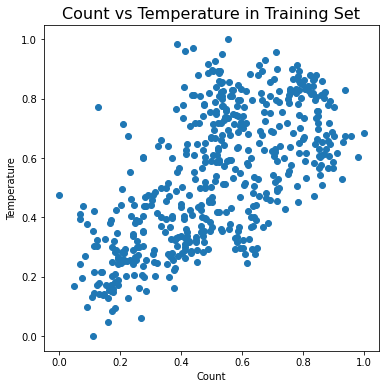

In [27]:
# create a scatterplot with cnt and temp
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.temp)
plt.title('Count vs Temperature in Training Set', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Temperature')
plt.show()

In [28]:
## Dividing into X and Y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

***
### Insights into the split set
Since the trend is highest to `cnt`, it is used as the first variable to fit a regression line.
***

## 5. Feature Engineering

### Data modelling and evaluation
The aims of this section are:
- create linear regression model using mixed approach (RFE & VIF/p-Value)
- check the various assumptions
- check the adjusted r-square for both train and test data
- report the final model

## 5.1 Recursive feature elimination (RFE)
Feature selection refers to selecting a subset of the most relevant features (columns) for a dataset. Fewer features can allow machine learning algorithms to run more efficiently (less space or time complexity) and be more effective. Here, the model starts by including all variables, and the model is reduced in complexity by dropping variables one by one, and rebuilding the model after each dropped variable to observe the impact of the dropped variables.

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 3),
 ('feb', False, 5),
 ('jan', False, 2),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 4),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 7),
 ('sun', True, 1),
 ('thurs', False, 9),
 ('tues', False, 13),
 ('wed', False, 10),
 ('cloudy', True, 1),
 ('misty', True, 1)]

In the list above, it is noticable that all columns where RFE support is true have equal scores of 1. This means that they could be considered useful features for the model. The usefulness may change throughout the model building progress. This is because RFE aims to remove the worst performing feature. 

In [31]:
# columns were rfe support is true
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jul', 'sep', 'mon', 'sun', 'cloudy', 'misty'],
      dtype='object')

These are the columns that will be used in establishing the model.

In [32]:
# columns were rfe is false
colfls=X_train.columns[~rfe.support_]
colfls

Index(['aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may', 'nov', 'oct', 'sat',
       'thurs', 'tues', 'wed'],
      dtype='object')

These columns will not be considered.

## 5.1.1. Model building with statsmodel using RFE

In [33]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

The training dataframe is constructed using the RFE supported variables 

In [34]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

Adding a constant or intercept creates a model that is unbiased, because the mean of the residuals will be around zero.

In [35]:
# running the model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [36]:
# show the detailed summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.13e-191
Time:                        01:07:53   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

In the summary, it is noticable that `holiday` has a very low coefficient and a high p-value. As a result, it is dropped.

In [37]:
# dropping holiday
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [38]:
# rebuilding the model without holiday
X_train_lm = sm.add_constant(X_train_new)

In [39]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [40]:
# show the detailed summary of the model results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.13e-191
Time:                        01:07:54   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

## 5.2 Checking VIF and rebuilding model
The Variance Inflation Factor or VIF, provides a basic idea about how much the feature variables are correlated with each other. It is an important parameter, and high values should be dropped.

In [41]:
#Drop the constant
X_train_rfe = X_train_lm.drop(['const'], axis=1)

In [42]:
# calculate the VIF scores
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
11,sun,4.91
4,windspeed,4.90
5,spring,4.80
10,mon,4.76
7,winter,3.71
6,summer,3.03
13,misty,2.31


## 5.2.1 New model 1
`hum` can be dropped because of very high VIF

In [43]:
#Drop hum
X_train_new1 = X_train_rfe.drop(["hum"], axis = 1)

In [44]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          5.73e-189
Time:                        01:07:55   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [45]:
#Drop the constant term 
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
10,sun,4.45
9,mon,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
7,jul,1.60


## 5.2.2 New model 2
`workingday` can be dropped because of a very high VIF

In [47]:
#Drop workingday
X_train_new2 = X_train_lm1.drop(["workingday"], axis = 1)

In [48]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.01e-186
Time:                        01:07:56   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

In [49]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,summer,2.23
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,jul,1.59
11,misty,1.55
7,sep,1.33
9,sun,1.22


## 5.2.3 New model 3
`windspeed` does not seem to be significant, considering a fairly high VIF and negative correlation with count.

In [51]:
# Rebuilding the module without windspeed
#Drop windspeed
X_train_new3= X_train_lm2.drop(['windspeed'], axis=1)

In [52]:
#Build a model
X_train_lm3=sm.add_constant(X_train_new3)
lm3=sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.64e-180
Time:                        01:07:57   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -941.0
Df Residuals:                     498   BIC:                            -890.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1507      0.029      5.120      0.0

In [53]:
#Drop constant
X_train_lm3= X_train_lm3.drop(['const'], axis=1)

In [54]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.33
0,yr,2.07
3,summer,1.95
4,winter,1.62
5,jul,1.59
10,misty,1.55
2,spring,1.45
6,sep,1.33
8,sun,1.22
7,mon,1.21


## 5.2.4 New model 4
`sun` is dropped because of high p-value and low VIF 

In [55]:
# Rebuilding the module without sunday
#Drop sun
X_train_new4= X_train_lm3.drop(['sun'], axis=1)

In [56]:
#Build a model
X_train_lm4=sm.add_constant(X_train_new4)
lm4=sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.94e-181
Time:                        01:07:59   Log-Likelihood:                 481.93
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     499   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1535      0.029      5.239      0.0

In [57]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.26
0,yr,2.06
3,summer,1.93
4,winter,1.59
5,jul,1.58
9,misty,1.54
2,spring,1.41
6,sep,1.33
7,mon,1.17
8,cloudy,1.07


The resulting model is lm4. `holiday`, `workingday`, `hum`, `windspeed` and `sun` have been dropped based on RFE, using VIF and p-value to eliminate features.

## 5.2.5 Residual analysis of the training data
Checking if the error terms are normally distributed in the created model which is a major assumption of linear regression

In [59]:
X_train_new4.shape

(510, 10)

In [60]:
# add constant to match dimensions between the data sets
X_train_lm4=sm.add_constant(X_train_new4)

In [61]:
# define y train pred data
y_train_pred = lm4.predict(X_train_lm4)

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

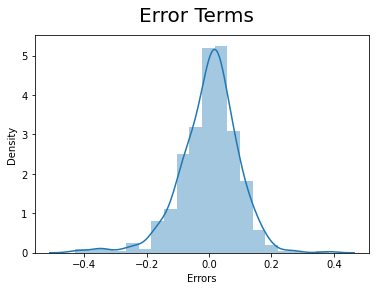

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors')                         # X-label

The error terms are normally distributed.

## 5.3 Predictions
Before the predictions can be made, the test sets have to be prepared: scaling is applied to the test set and the result is divided into X test and Y test.

In [63]:
#Create a list of numeric variables

num_vars=['temp','hum','windspeed','cnt']

#Fit on data and scale it
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
# check the output
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Dividing into X_test and y_test

In [65]:
# Like earlier, count is used to divide the data set
y_test = df_test.pop('cnt')
X_test = df_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thurs,tues,wed,cloudy,misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# check the columns in the data set of model 4
X_train_new4.columns

Index(['yr', 'temp', 'spring', 'summer', 'winter', 'jul', 'sep', 'mon',
       'cloudy', 'misty'],
      dtype='object')

In [67]:
# Use model 4 to make predictions
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,temp,spring,summer,winter,jul,sep,mon,cloudy,misty
184,1.0,0,0.831783,0,0,0,1,0,0,0,1
535,1.0,1,0.901354,0,1,0,0,0,0,0,0
299,1.0,0,0.511964,0,0,1,0,0,0,0,1
221,1.0,0,0.881625,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0,1,0,0,0,0,0,0


In [68]:
# Making predictions
y_pred = lm4.predict(X_test_new)

## 5.4 Evaluation of the model

Text(0, 0.5, 'y_pred')

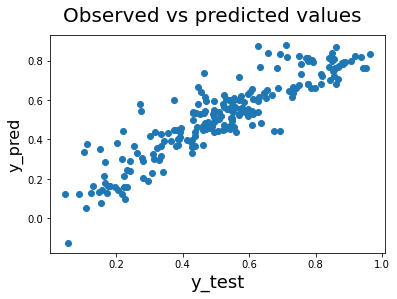

In [69]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Observed vs predicted values', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

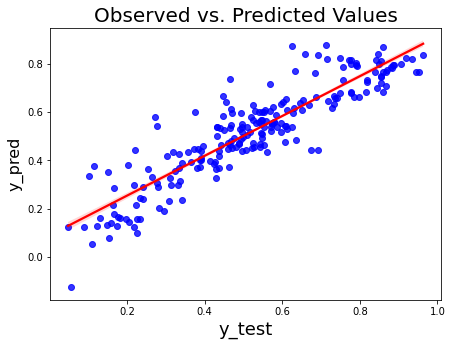

In [70]:
#Regression plot
plt.figure(figsize=(7,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Observed vs. Predicted Values', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


The output shows the line of best fit in the regression plot. This scatterplot shows actual and predicted values to demonstrate linearity. Actual and predicted values are closely scattered around the regression line with few violations of the assumption.

## 5.5 R-squared for test set

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8098104466244752

The coefficient of determination shows that 81% of the variation in the dependent variable is predictable from the independent variable.

## 5.6 Check for Other assumptions
### 5.6.1 Check for Multicollinearity

C:\Users\geral\AppData\Local\Temp\ipykernel_35372\1569261987.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot:title={'center':'Multicollinearity of Variables'}>

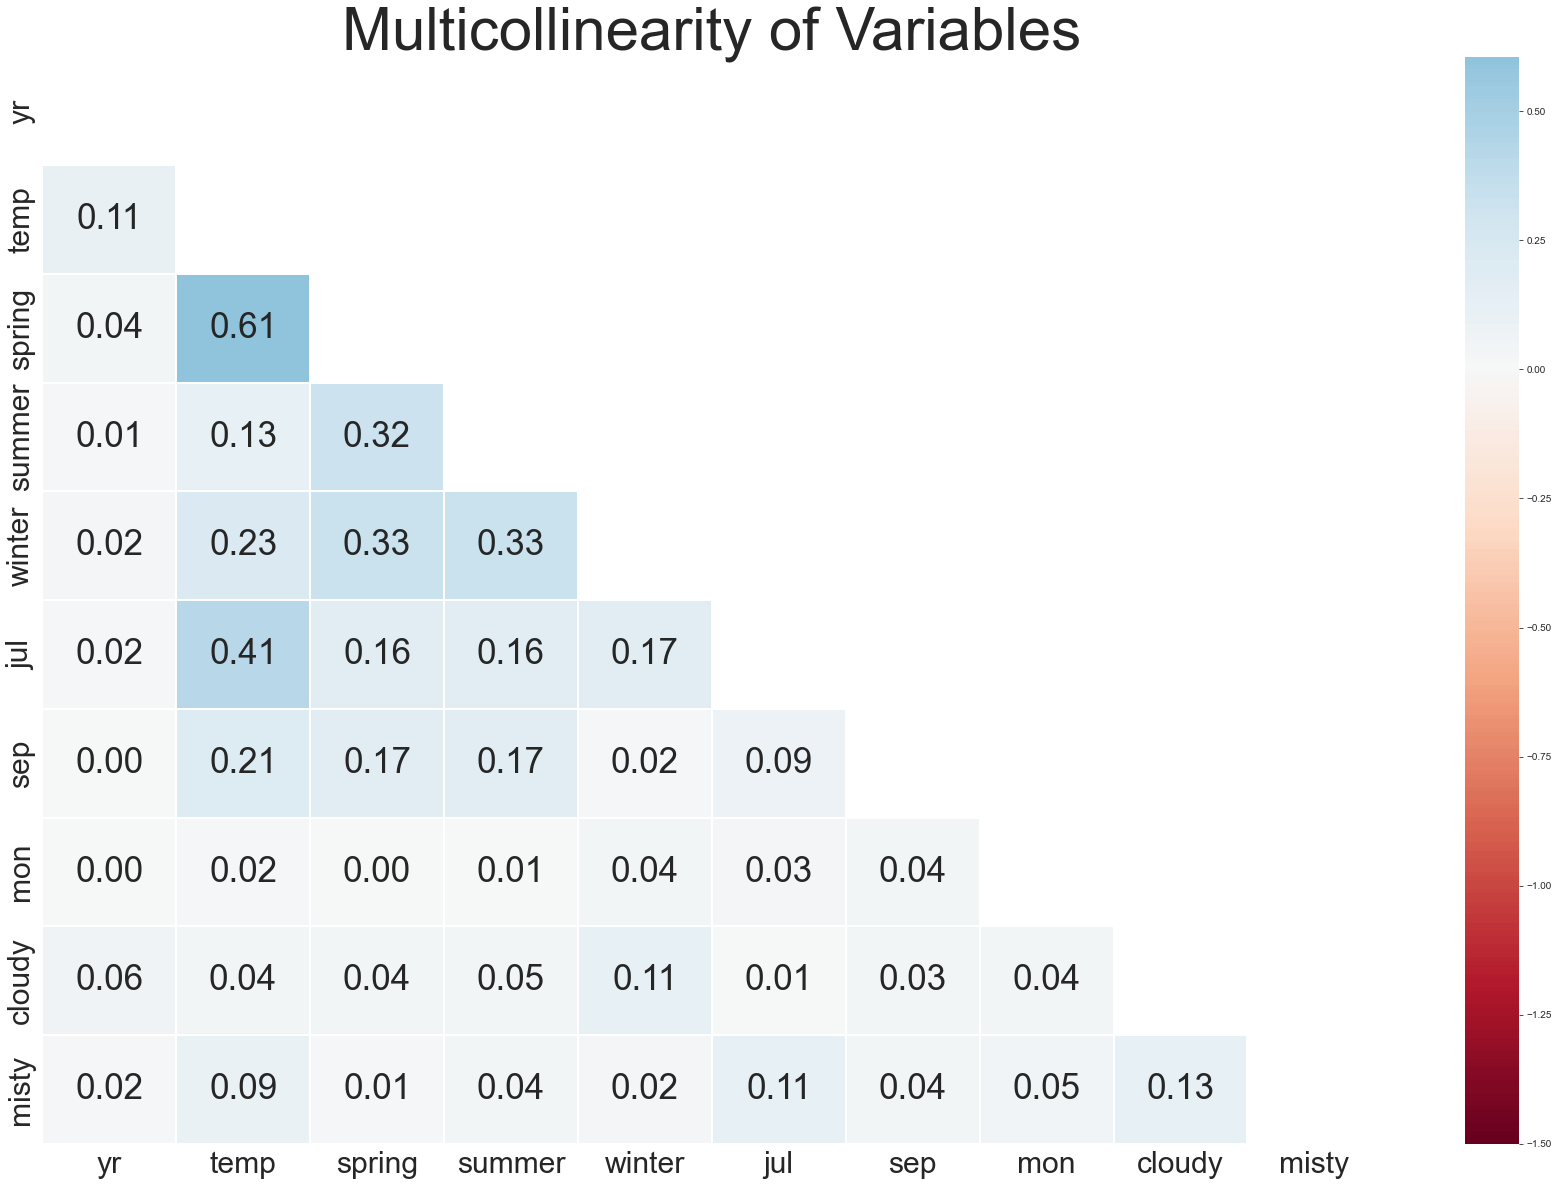

In [72]:
sns.set_style('whitegrid')
correlation = abs(X_train_new4.corr())
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,20))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Multicollinearity of Variables', fontsize=60)
sns.heatmap(correlation, 
            cmap='RdBu', 
            annot=True, 
            fmt=".2f", 
            annot_kws={"size": 35}, 
            linewidths=2, 
            vmin=-1.5, 
            mask=mask,
           center=0)

Multicollinearity is present in the model if variables are highly correlated. High correlation is commonly defined as at or above .80. The matrix shows that no such correlations exist in the model.

### 5.6.2 Check for Autocorrelations

In [73]:
durbin_watson(lm4.resid)


2.0019044250922957

Autocorrelation of the regression residuals can occur in incorrectly specified models. It violates the assumption that observations should be independent of each other. In the present data, this could have been a problem, because various variables describe points in time in different ways, and temperature is also linked to different times of the year. A result of two, like in the model created here, indicates no autocorrelation.

### 5.6.3 Check for Homoscedasticity

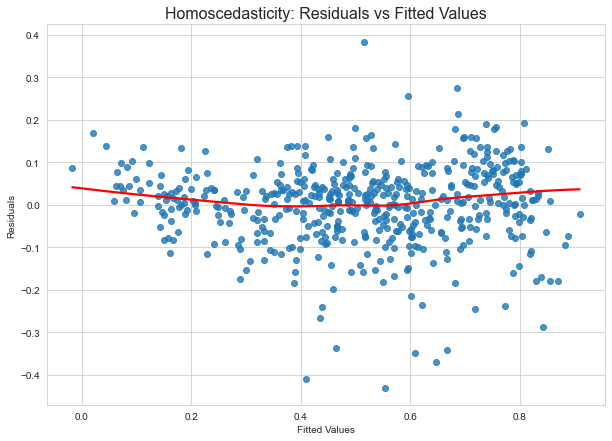

In [74]:
def homoscedasticity(model):
    y_pred = model.predict() 
    residuals = model.resid
    plt.figure(figsize=(10,7))
    sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
    plt.title('Homoscedasticity: Residuals vs Fitted Values', fontsize=16)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
homoscedasticity(lm4)

Homoscedasticity assumes that residuals have the same variability along the regression line.

### 5.6.4 Check Normality of Residuals

C:\Users\geral\.virtualenvs\Prep-gSb9PLii\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


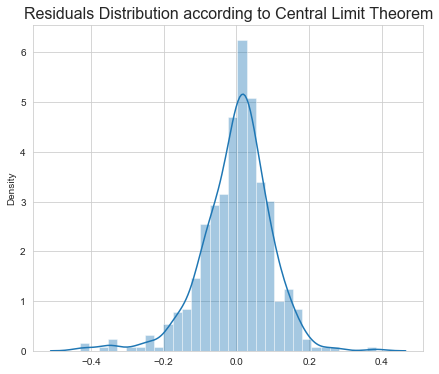

In [75]:
def normality(model):
    residuals = model.resid
    plt.figure(figsize=(7,6))
    sns.distplot(residuals)
    plt.title('Residuals Distribution according to Central Limit Theorem', fontsize=16)
normality(lm4)

The residuals follow a normal distribution.

## 5.6.5 QQ Plot

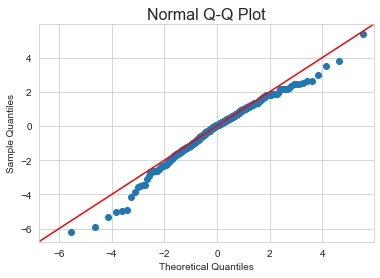

In [76]:
def qqplot(model):
    residuals = model.resid
    fig = sm.qqplot(residuals, stats.t, fit=True, line="45")
    plt.title('Normal Q-Q Plot', fontsize=16)
    plt.show()
qqplot(lm4)


In addition to the visualisation of the normal distribution above, Q-Q plots can also be used to visualise normal distribution. The data in the normal distribution curve above shows that it is normally distributed, but has a light peak in the middle and slightly thin tails. As a result, the Q-Q plot is also largely normally distributed, with light tails. This relates to the Kurtosis of the data. A thin tailed distribution forms a Q-Q plot with very small and negligible deviation at the ends, indicating normal distribution.

## 6. Insights

Examining model 4, it can be observed that `temp` has the highest coefficient, with 0.50. This means, that when the temperature increases by one unit, the count of bike rentals also increases by 0.50. The next highest coefficient is `yr` with 0.23. There are also negative coefficients which show a relation in the opposite direction. The largest negative coefficient is `cloudy` with -0.30.
Temperature and weather are important factors the company should consider when making business decisions. It would also seem that the demand for bikes is growing by passing years. The pandemic is hopefully not going to diminish this demand, so that the company can recover.